N=7: max error at sample points = 4.441e-16
N=12: max error at sample points = 9.992e-16
N=40: max error at sample points = 3.775e-15


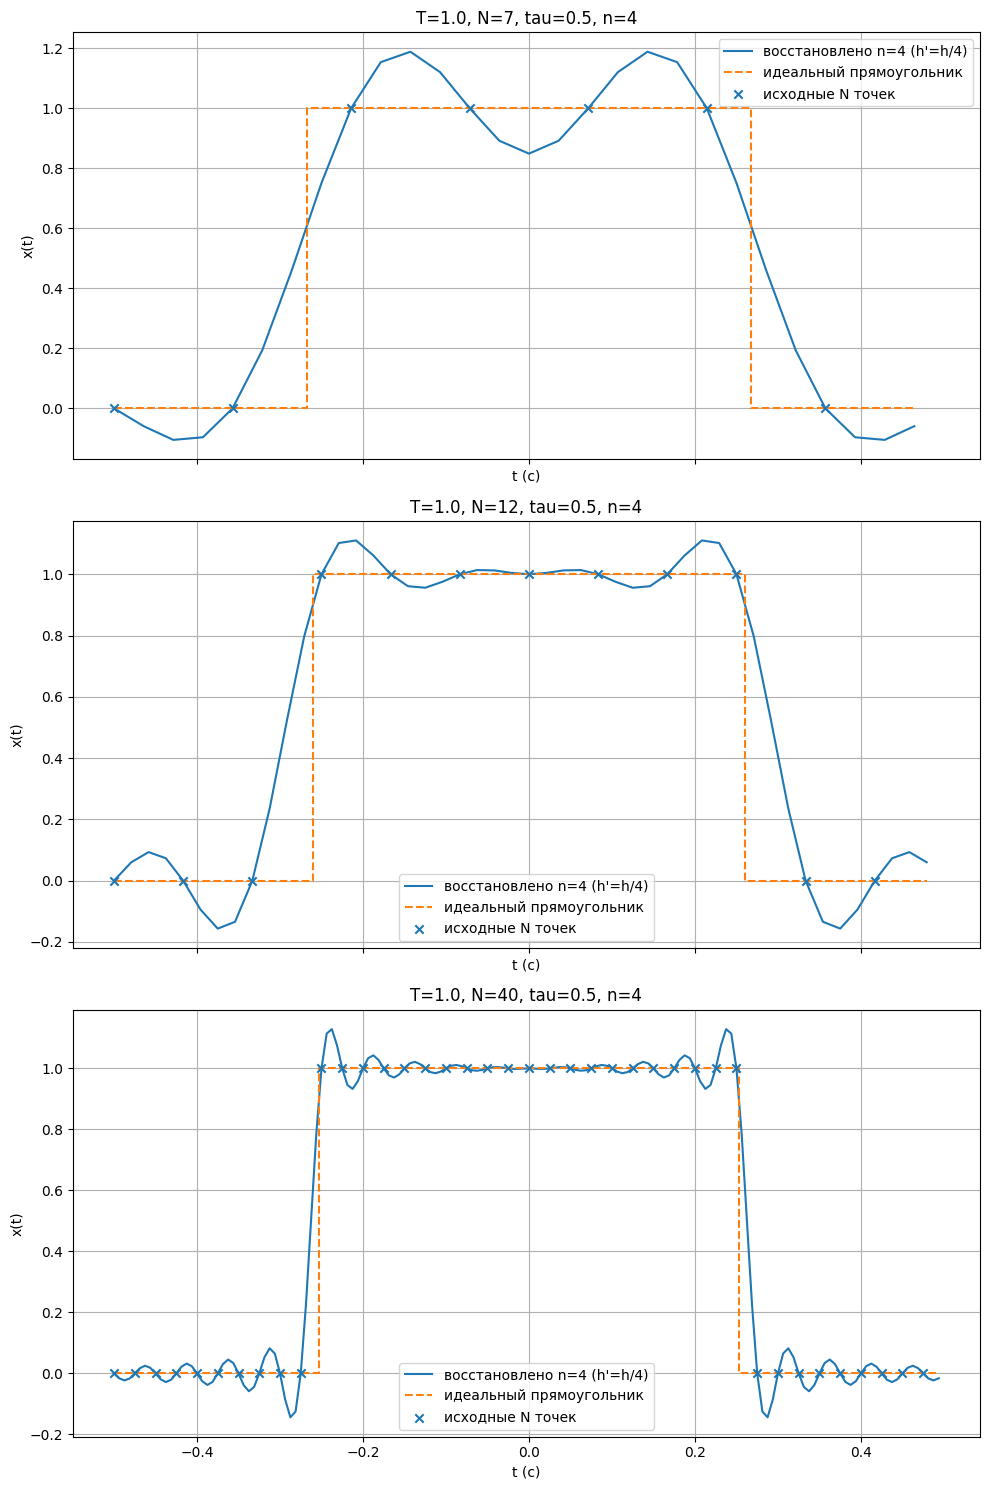

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def build_time_grid(T: float, N: int, n_upsample: int):
    h = T / N
    t_samples = -T / 2 + np.arange(N) * h
    t_dense   = -T / 2 + np.arange(N * n_upsample) * h / n_upsample
    return h, t_samples, t_dense


def rect_periodic(t: np.ndarray, T: float = 1.0, tau: float = 0.5):
    t_mod = ((t + T / 2) % T) - T / 2
    return (np.abs(t_mod) <= tau / 2).astype(float)


def sinc_reconstruct(x_samples: np.ndarray, T: float, n_upsample: int = 4):
    N = len(x_samples)
    h, t_samples, t_dense = build_time_grid(T, N, n_upsample)

    dt = t_dense[:, None] - t_samples[None, :]
    kernel = np.sinc(dt / h)          # ключевое место

    x_dense = kernel @ x_samples
    return h, t_samples, t_dense, x_dense


def plot_case(ax, T, N, tau, n):
    h = T / N
    t_samples = -T / 2 + np.arange(N) * h
    x_samples = rect_periodic(t_samples, T, tau)

    h2, t_s, t_d, x_d = sinc_reconstruct(x_samples, T, n)
    x_rect_dense = rect_periodic(t_d, T, tau)

    # проверка интерполяционного свойства
    max_err = np.max(np.abs(x_d[::n] - x_samples))
    print(f"N={N}: max error at sample points = {max_err:.3e}")

    ax.plot(t_d, x_d, label=f"восстановлено n={n} (h'=h/{n})")
    # рисуем прямоугольник ступеньками, чтобы не было "трапеции"
    ax.step(t_d, x_rect_dense, where="mid",
            linestyle="--", label="идеальный прямоугольник")
    ax.scatter(t_samples, x_samples, marker='x',
               zorder=3, label="исходные N точек")

    ax.set_title(f"T={T}, N={N}, tau={tau}, n={n}")
    ax.set_xlabel("t (с)")
    ax.set_ylabel("x(t)")
    ax.grid(True)
    ax.legend()


def main():
    T = 1.0
    tau = 0.5
    n = 4

    fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

    # 1) исходный вариант задачи
    plot_case(axs[0], T=T, N=7, tau=tau, n=n)

    # 2) пример с меньшим числом точек
    plot_case(axs[1], T=T, N=12, tau=tau, n=n)

    # 3) пример с еще меньшим числом точек
    plot_case(axs[2], T=T, N=40, tau=tau, n=n)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


N=7: max error at sample points = 4.441e-16
N=12: max error at sample points = 9.992e-16
N=40: max error at sample points = 3.775e-15


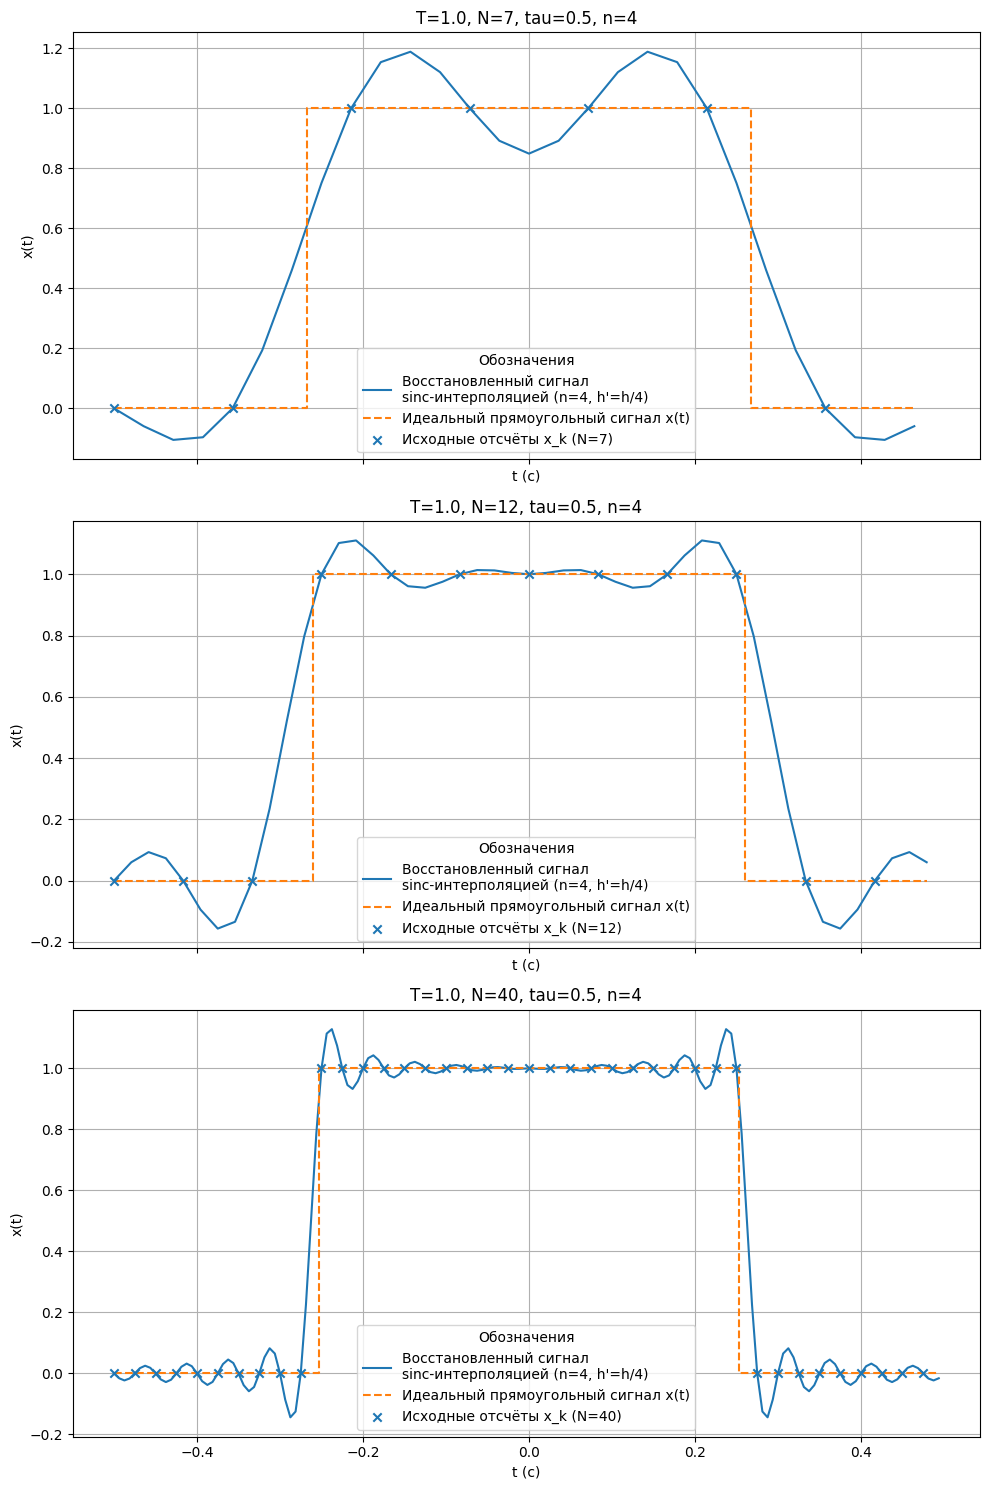

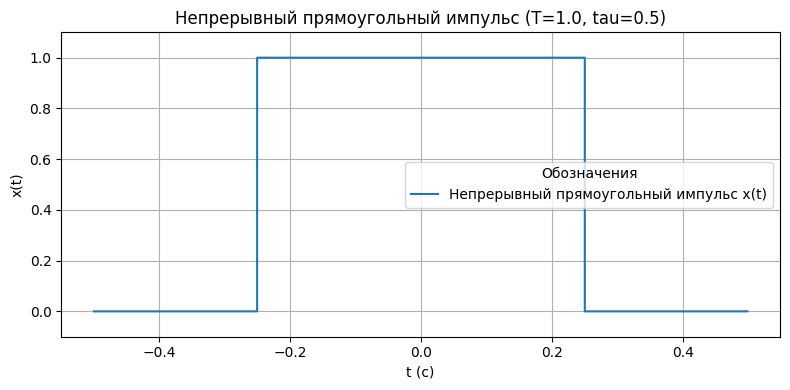

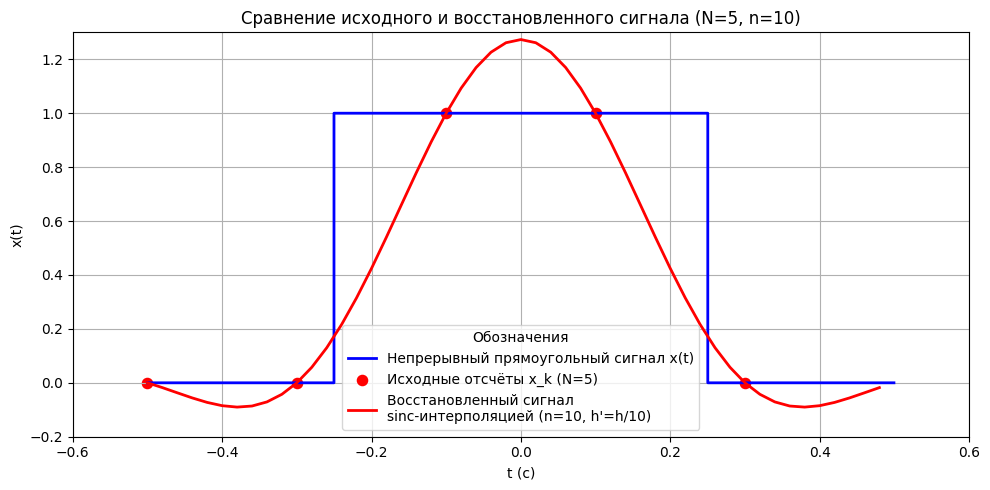

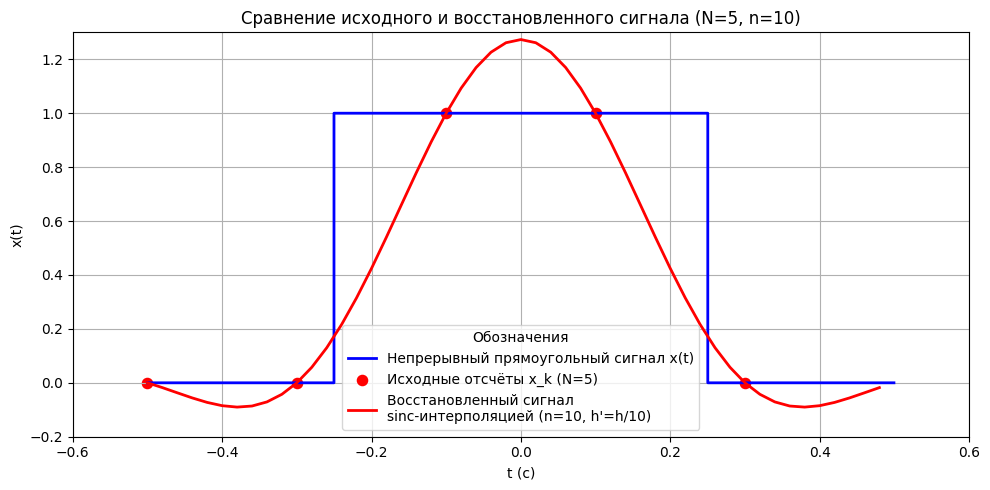

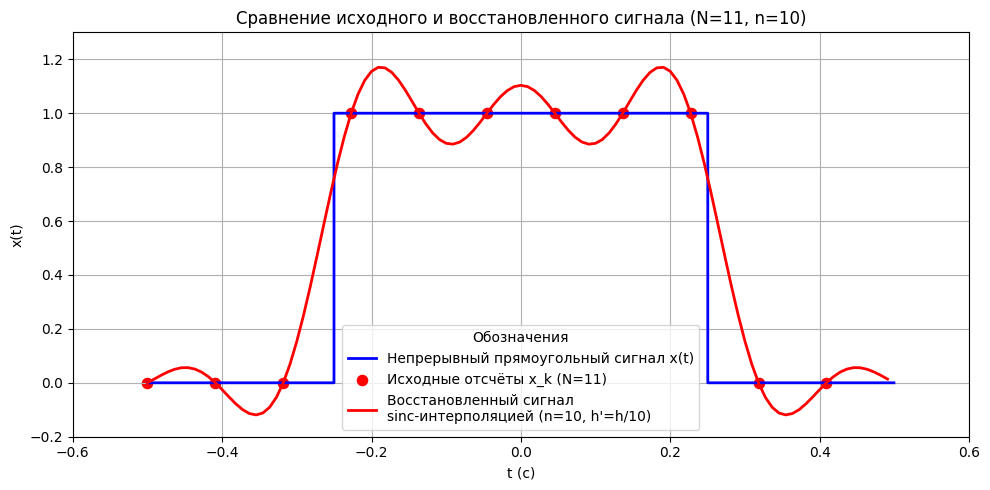

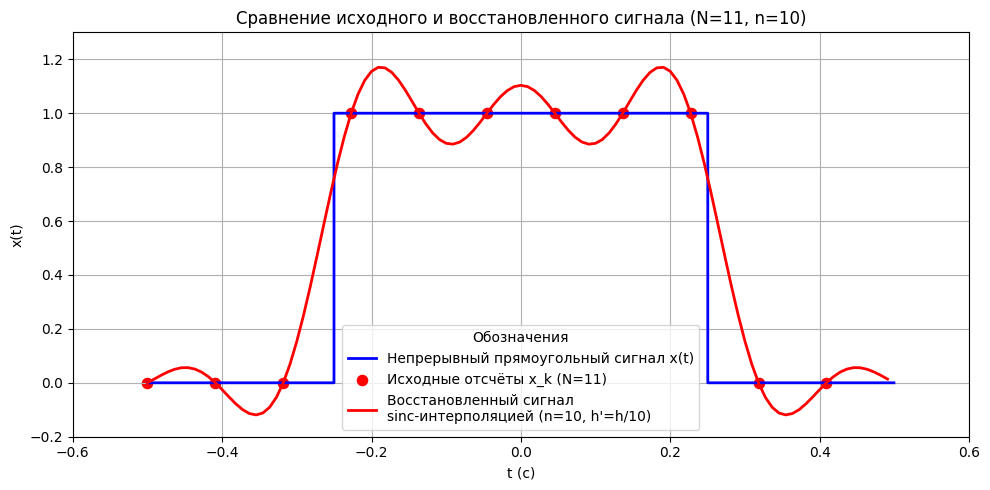

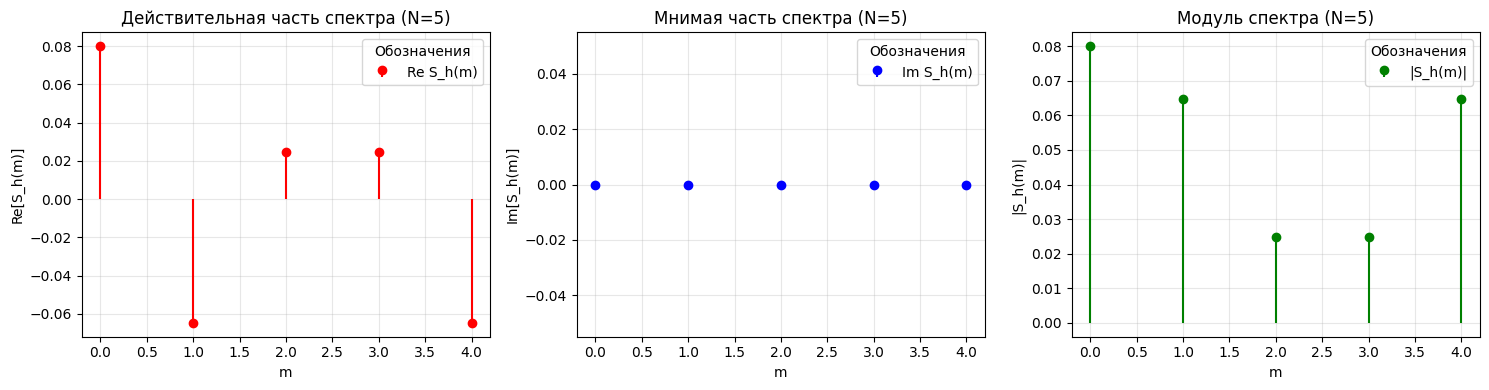

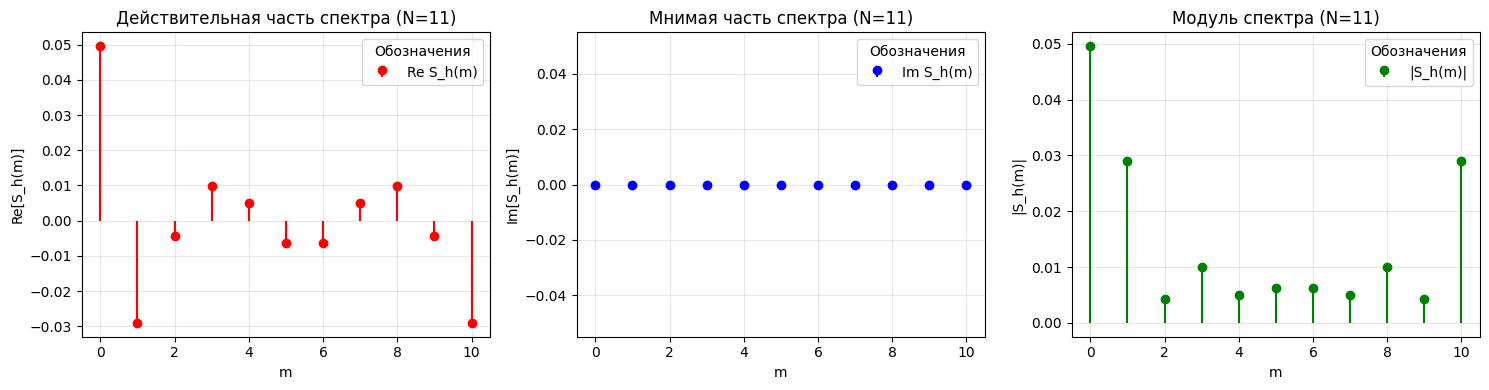

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def build_time_grid(T: float, N: int, n_upsample: int):
    h = T / N
    t_samples = -T / 2 + np.arange(N) * h
    t_dense   = -T / 2 + np.arange(N * n_upsample) * h / n_upsample
    return h, t_samples, t_dense


def rect_periodic(t: np.ndarray, T: float = 1.0, tau: float = 0.5):
    t_mod = ((t + T / 2) % T) - T / 2
    return (np.abs(t_mod) <= tau / 2).astype(float)


def sinc_reconstruct(x_samples: np.ndarray, T: float, n_upsample: int = 4):
    N = len(x_samples)
    h, t_samples, t_dense = build_time_grid(T, N, n_upsample)

    dt = t_dense[:, None] - t_samples[None, :]
    kernel = np.sinc(dt / h)

    x_dense = kernel @ x_samples
    return h, t_samples, t_dense, x_dense


def plot_case(ax, T, N, tau, n):
    h = T / N
    t_samples = -T / 2 + np.arange(N) * h
    x_samples = rect_periodic(t_samples, T, tau)

    h2, t_s, t_d, x_d = sinc_reconstruct(x_samples, T, n)
    x_rect_dense = rect_periodic(t_d, T, tau)

    # проверка интерполяционного свойства
    max_err = np.max(np.abs(x_d[::n] - x_samples))
    print(f"N={N}: max error at sample points = {max_err:.3e}")

    ax.plot(
        t_d,
        x_d,
        label=f"Восстановленный сигнал\nsinc-интерполяцией (n={n}, h'=h/{n})",
    )
    ax.step(
        t_d,
        x_rect_dense,
        where="mid",
        linestyle="--",
        label="Идеальный прямоугольный сигнал x(t)",
    )
    ax.scatter(
        t_samples,
        x_samples,
        marker="x",
        zorder=3,
        label=f"Исходные отсчёты x_k (N={N})",
    )

    ax.set_title(f"T={T}, N={N}, tau={tau}, n={n}")
    ax.set_xlabel("t (с)")
    ax.set_ylabel("x(t)")
    ax.grid(True)
    ax.legend(title="Обозначения", loc="best")


def main():
    T = 1.0
    tau = 0.5
    n = 4

    fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

    # 1) исходный вариант задачи
    plot_case(axs[0], T=T, N=7, tau=tau, n=n)

    # 2) пример с другим числом точек
    plot_case(axs[1], T=T, N=12, tau=tau, n=n)

    # 3) пример с большим числом точек
    plot_case(axs[2], T=T, N=40, tau=tau, n=n)

    plt.tight_layout()
    plt.show()


# ===== НОВЫЕ ФУНКЦИИ ДЛЯ ТЕХ ЖЕ ТИПОВ ГРАФИКОВ =====

def plot_rect_continuous(T: float, tau: float, num_points: int = 1000):
    """Непрерывный прямоугольный импульс за один период."""
    t = np.linspace(-T / 2, T / 2, num_points, endpoint=False)
    x = rect_periodic(t, T, tau)

    plt.figure(figsize=(8, 4))
    plt.step(
        t,
        x,
        where="mid",
        label="Непрерывный прямоугольный импульс x(t)",
    )
    plt.title(f"Непрерывный прямоугольный импульс (T={T}, tau={tau})")
    plt.xlabel("t (с)")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.ylim(-0.1, 1.1)
    plt.legend(title="Обозначения", loc="best")
    plt.tight_layout()
    plt.show()


def compute_discrete_rect(T: float, N: int, tau: float):
    h = T / N
    t_samples = -T / 2 + np.arange(N) * h
    x_samples = rect_periodic(t_samples, T, tau)
    return h, t_samples, x_samples


def compute_rect_spectrum(x_samples: np.ndarray, h: float):
    N = len(x_samples)
    S_h = (h / N) * np.fft.fft(x_samples)
    return S_h


def plot_time_cases(T: float, tau: float,
                    N_values=(5, 11), n_values=(2, 4)):
    """Графики 'непрерывный + дискретный + восстановленный' для всех (N, n)."""
    for N in N_values:
        for n in n_values:
            h, t_samples, x_samples = compute_discrete_rect(T, N, tau)
            _, _, t_dense, x_dense = sinc_reconstruct(x_samples, T, n)

            t_cont = np.linspace(-T / 2, T / 2, 2000, endpoint=False)
            x_cont = rect_periodic(t_cont, T, tau)

            plt.figure(figsize=(10, 5))
            plt.step(
                t_cont,
                x_cont,
                where="mid",
                c="blue",
                linewidth=2,
                label="Непрерывный прямоугольный сигнал x(t)",
            )
            plt.scatter(
                t_samples,
                x_samples,
                c="r",
                s=40,
                linewidth=2,
                label=f"Исходные отсчёты x_k (N={N})",
            )
            plt.plot(
                t_dense,
                x_dense,
                c = "r",
                linewidth=2,
                label=f"Восстановленный сигнал\nsinc-интерполяцией (n={n}, h'=h/{n})",
            )

            plt.title(f"Сравнение исходного и восстановленного сигнала (N={N}, n={n})")
            plt.xlabel("t (с)")
            plt.ylabel("x(t)")
            plt.grid(True)
            plt.ylim(-0.2, 1.3)
            plt.xlim(-T / 2 - 0.1, T / 2 + 0.1)
            plt.legend(title="Обозначения", loc="best")
            plt.tight_layout()
            plt.show()


def plot_rect_spectrum(T: float, tau: float, N_values=(5, 11)):
    """Графики спектров: Re, Im, |S_h| для разных N."""
    for N in N_values:
        h, t_samples, x_samples = compute_discrete_rect(T, N, tau)
        S_h = compute_rect_spectrum(x_samples, h)
        k = np.arange(N)

        fig, axs = plt.subplots(1, 3, figsize=(15, 4))

        axs[0].stem(
            k,
            S_h.real,
            linefmt="r-",
            markerfmt="ro",
            basefmt=" ",
            label="Re S_h(m)",
        )
        axs[0].set_title(f"Действительная часть спектра (N={N})")
        axs[0].set_xlabel("m")
        axs[0].set_ylabel("Re[S_h(m)]")
        axs[0].grid(True, alpha=0.3)
        axs[0].legend(title="Обозначения", loc="best")

        axs[1].stem(
            k,
            S_h.imag,
            linefmt="b-",
            markerfmt="bo",
            basefmt=" ",
            label="Im S_h(m)",
        )
        axs[1].set_title(f"Мнимая часть спектра (N={N})")
        axs[1].set_xlabel("m")
        axs[1].set_ylabel("Im[S_h(m)]")
        axs[1].grid(True, alpha=0.3)
        axs[1].legend(title="Обозначения", loc="best")

        axs[2].stem(
            k,
            np.abs(S_h),
            linefmt="g-",
            markerfmt="go",
            basefmt=" ",
            label="|S_h(m)|",
        )
        axs[2].set_title(f"Модуль спектра (N={N})")
        axs[2].set_xlabel("m")
        axs[2].set_ylabel("|S_h(m)|")
        axs[2].grid(True, alpha=0.3)
        axs[2].legend(title="Обозначения", loc="best")

        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    # твои три случая N в одном окне
    main()

    # непрерывный прямоугольный импульс
    T = 1.0
    tau = 0.5
    plot_rect_continuous(T, tau)

    # временная область для разных N и n
    plot_time_cases(T, tau, N_values=(5, 11), n_values=(10, 10))

    # спектры
    plot_rect_spectrum(T, tau, N_values=(5, 11))
